In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

### 1.获取数据集

In [3]:
fashion_mnist = keras.datasets.fashion_mnist  # 将keras中的datasets的fashion_mnis类指向一个变量名
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()  # 使用这个类中的load_data()函数加载数据

# 自行切分验证集合与训练集
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

### 2.特征工程

In [5]:
from sklearn.preprocessing import StandardScaler

# 对训练集、验证集、测试集进行规范化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

### 3.搭建模型

In [7]:
# 初始化模型序列
model = keras.models.Sequential()

# 输入层，将图像矩阵数据展平为一维传入
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# 添加隐藏层，20层
for _ in range(20):
    # 指定每层的神经元数目和激活函数
    model.add(keras.layers.Dense(100, activation='relu'))

# 输出层，最后输出神经元个数为10，激活函数为softmax计算损失值
model.add(keras.layers.Dense(10, activation='softmax'))

# 编译整个模型，指定损失函数、优化器、以及混淆矩阵使用的指标
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(0.01),
             metrics=['accuracy'])
# 查看模型概要
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)              

### 4.训练模型

In [19]:
# 指定训练过程记录输出文件位置
logdir = './dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, 'fashion_mnist_model.h5')

# 指定回调函数
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]

# 开始训练并将训练历史保存起来
history = model.fit(x_train_scaled, y_train, epochs=50,
                   validation_data=(x_valid_scaled, y_valid),
                   callbacks=callbacks)

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3129 - accuracy: 0.8899 - val_loss: 0.3470 - val_accuracy: 0.8824
Epoch 2/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2993 - accuracy: 0.8937 - val_loss: 0.3652 - val_accuracy: 0.8774
Epoch 3/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2887 - accuracy: 0.8983 - val_loss: 0.3532 - val_accuracy: 0.8838
Epoch 4/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2749 - accuracy: 0.9022 - val_loss: 0.3432 - val_accuracy: 0.8814
Epoch 5/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2689 - accuracy: 0.9038 - val_loss: 0.3417 - val_accuracy: 0.8844
Epoch 6/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2595 - accuracy: 0.9071 - val_loss: 0.3405 - val_accuracy: 0.8824
Epoch 7/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2516 - accuracy: 0.9099 - val_loss: 0.3497 - val_accuracy:

### 5.训练过程可视化

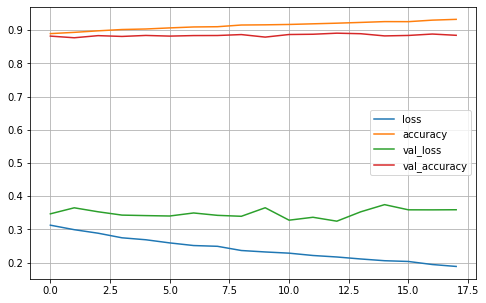

In [21]:
# 定义绘图函数
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
#     plt.gca().set_ylim(0, 2)  # 限制坐标轴大小
#     plt.gca().set_xlim(0, 9)
    plt.show()

plot_learning_curves(history)

### 6.使用测试集评估模型

In [22]:
model.evaluate(x_test_scaled, y_test, verbose=0)  # verbose指定是否输出计算过程，0为不输出，1为输出，2为每一个epochs都输出，默认为1

[0.401534765958786, 0.8729000091552734]